<a href="https://colab.research.google.com/github/AhmedSaleh171/Thesis/blob/main/Uberset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# !pip install numpy==1.26.4 pandas==2.2.2 --quiet
# !pip install catboost --quiet
# !pip install streamlit --quiet


# ba3d el install e3mel runtime --> restart session

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import streamlit as st

df = pd.read_csv('https://raw.githubusercontent.com/AhmedSaleh171/Thesis/refs/heads/main/Uber_dynamic_pricing.csv')
df.head()





,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


#Encoding

In [38]:
# df['Vehicle_Type'] = df['Vehicle_Type'].apply(lambda x: 1 if x == 'Premium' else 0).astype(int)

# one_hot_columns = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking']
# one_hot_encoded = pd.get_dummies(df[one_hot_columns], prefix=one_hot_columns)
# one_hot_encoded = one_hot_encoded.astype(int)
# df= pd.concat([df,one_hot_encoded], axis=1)
# df= df.drop(columns=one_hot_columns)
# df.head()
df.isnull().sum()

,0
Number_of_Riders,0
Number_of_Drivers,0
Location_Category,0
Customer_Loyalty_Status,0
Number_of_Past_Rides,0
Average_Ratings,0
Time_of_Booking,0
Vehicle_Type,0
Expected_Ride_Duration,0
Historical_Cost_of_Ride,0


Text(0.5, 1.0, 'Correlation Heatmap of Features')

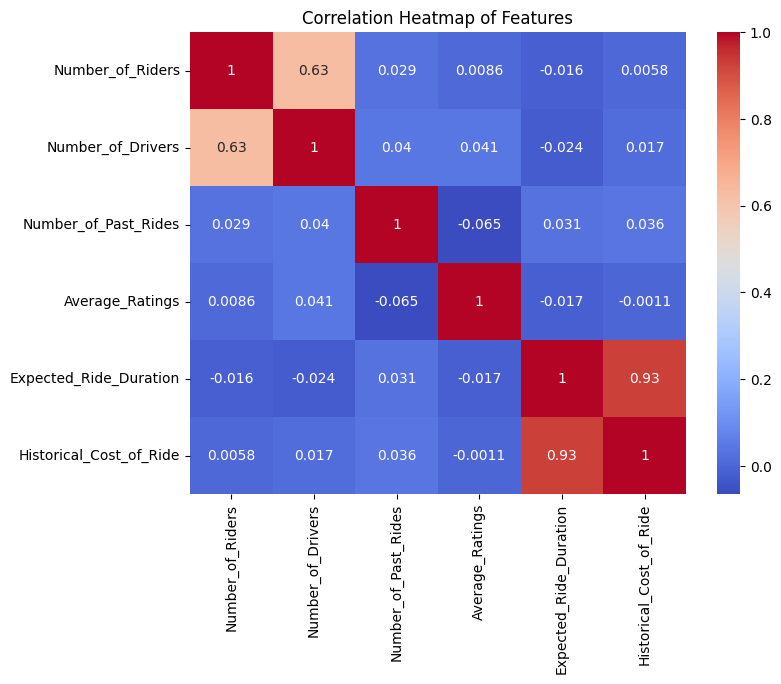

In [39]:
num_features=df.drop(columns=(['Vehicle_Type', 'Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking']))
plt.figure(figsize=(8,6))
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")

Text(0.5, 0.98, 'Feature Distributions')

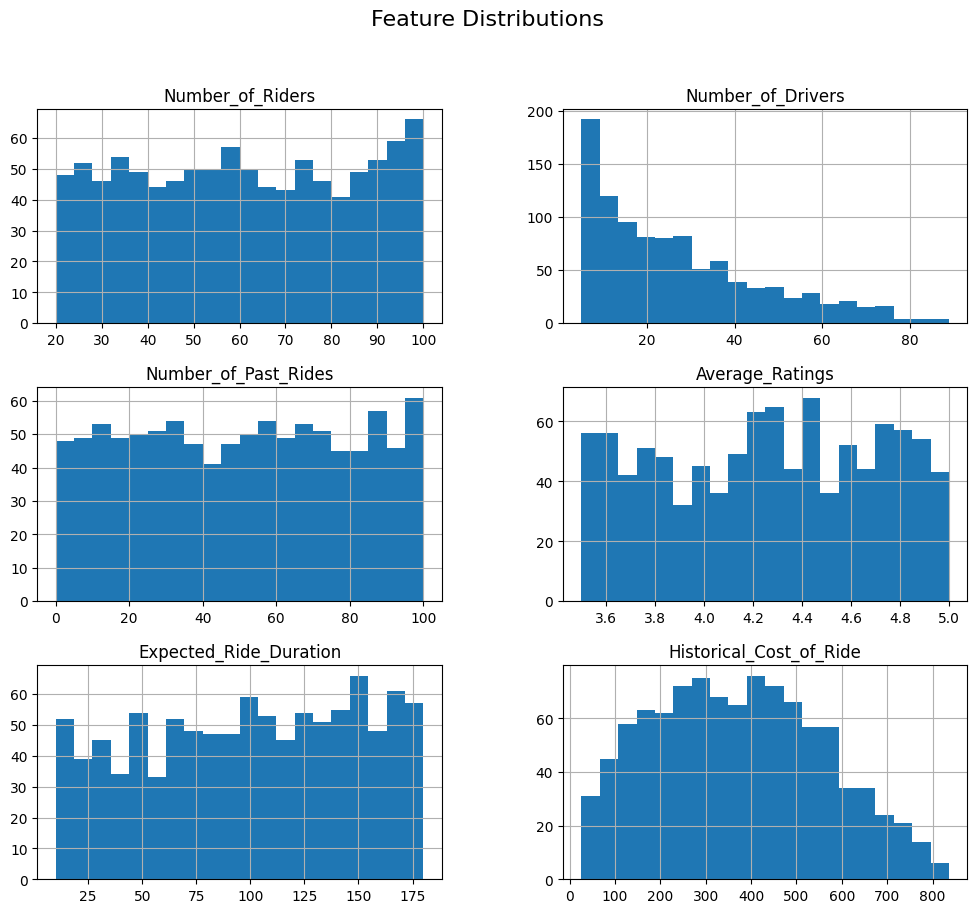

In [40]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)

Text(0.5, 1.0, 'Boxplot of Historical Ride Costs')

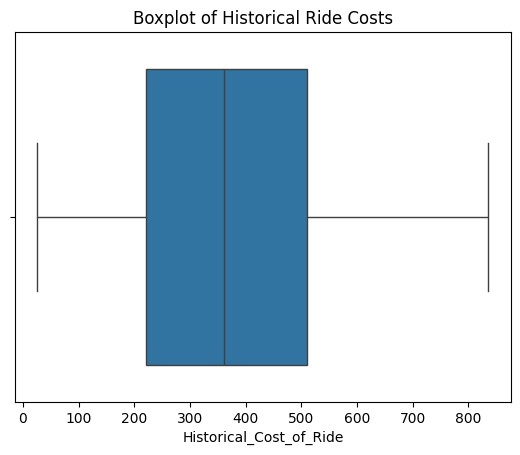

In [41]:
sns.boxplot(x=df['Historical_Cost_of_Ride'])
plt.title("Boxplot of Historical Ride Costs")

#Model

In [42]:
cat_features = ['Vehicle_Type', 'Location_Category', 'Customer_Loyalty_Status']

X = df.drop(columns=['Historical_Cost_of_Ride', 'Time_of_Booking'])
y = df['Historical_Cost_of_Ride']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

cat_model = CatBoostRegressor(iterations=115, learning_rate=0.05, depth=4, random_state=42, verbose=0)

cat_model.fit(X_train, y_train, cat_features=cat_features)

y_pred = cat_model.predict(X_test)



#Evaluation

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse_perc = (rmse / np.mean(y_test)) * 100
mae_perc = (mae / np.mean(y_test)) * 100

print(f"Root Mean Squared Error (RMSE): {rmse_perc:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_perc:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 17.88%
Mean Absolute Error (MAE): 13.72%
Mean Absolute Percentage Error (MAPE): 14.30%


#Frontend

In [44]:
st.title("Ride Price Estimator")

Number_of_Riders = st.number_input("Number of Riders", min_value=0)
Number_of_Drivers = st.number_input("Number of Drivers", min_value=0)
Location_Category = st.selectbox("Location Category", ['Rural', 'Suburban', 'Urban'])
Customer_Loyalty_Status = st.selectbox("Customer Loyalty Status", ['Regular', 'Silver', 'Gold'])
Number_of_Past_Rides = st.number_input("Number of Past Rides", min_value=0)
Average_Ratings = st.slider("Average Ratings", 0.0, 5.0, step=0.01)
Time_of_Booking = st.selectbox("Time of Booking", ['Morning', 'Afternoon', 'Evening', 'Night'])  # optional
Vehicle_Type = st.selectbox("Vehicle Type", ['0', '1'])  # Adjust options if you know their meaning
Expected_Ride_Duration = st.number_input("Expected Ride Duration (mins)", min_value=0)

if st.button("Estimate Ride Price"):
    input_data = pd.DataFrame([{
        'Number_of_Riders': Number_of_Riders,
        'Number_of_Drivers': Number_of_Drivers,
        'Location_Category': Location_Category,
        'Customer_Loyalty_Status': Customer_Loyalty_Status,
        'Number_of_Past_Rides': Number_of_Past_Rides,
        'Average_Ratings': Average_Ratings,
        'Vehicle_Type': int(Vehicle_Type),
        'Expected_Ride_Duration': Expected_Ride_Duration
    }])

    pred = cat_model.predict(input_data)[0]
    st.success(f"Estimated Ride Price: ${pred:.2f}")

/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1024: UserWarning: Expected 9 arguments for function <function predict_price at 0x794e778ceca0>, received 8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1028: UserWarning: Expected at least 9 arguments for function <function predict_price at 0x794e778ceca0>, received 8.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e5279f246575b8fc44.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
